# 금융 데이터 수집
## 라이브러리한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 
### https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

# 한국거래소 상장종목 전체

In [5]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
len(df_krx)

7129

# 뉴욕증권거래소 상장종목 전체

In [6]:
df_nyse = fdr.StockListing('NYSE')
df_nyse.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3311/3311 [00:09<00:00, 355.67it/s]


,Symbol,Name,Industry,IndustryCode
0,TSM,Taiwan Semiconductor Manufacturing Co Ltd ADR,반도체 및 반도체 장비,571010
1,BABA,Alibaba Group Holding Ltd ADR,소프트웨어 및 IT서비스,572010
2,V,Visa Inc Class A,소프트웨어 및 IT서비스,572010
3,JPM,JPMorgan Chase & Co,은행,551010
4,JNJ,Johnson & Johnson,제약,562010


In [8]:
len(df_nyse)

3311

# S&P 500 종목 전체

In [9]:
df_spx = fdr.StockListing('S&P500')
df_spx.head()

d:\encore-4team\step3 데이터 전처리\project_yfinance\venv\lib\site-packages\FinanceDataReader\wikipedia\listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie,Health Care,Pharmaceuticals
3,ABMD,Abiomed,Health Care,Health Care Equipment
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [10]:
len(df_spx)

505

# 가격 데이터 - 국내주식
단축 코드(6자리)를 사용.

코스피 종목: 068270(셀트리온), 005380(현대차) 등
코스닥 종목: 215600(신라젠), 151910(나노스) 등

In [11]:
# 신라젠, 2018년
df = fdr.DataReader('215600', '2018')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,95900,104000,93300,102500,6824281,0.096257
2018-01-03,102600,104900,99500,103000,4760150,0.004878
2018-01-04,102600,104000,92200,92200,6538665,-0.104854
2018-01-05,85800,101200,85700,100000,8318372,0.084599
2018-01-08,98000,98400,92500,93800,6352776,-0.062000
2018-01-09,96500,119200,93800,109000,12734902,0.162047
2018-01-10,105000,107300,97800,98000,6588397,-0.100917
2018-01-11,97600,100600,95200,96700,4115386,-0.013265
2018-01-12,99800,103300,97100,98100,6806596,0.014478


<AxesSubplot:xlabel='Date'>

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


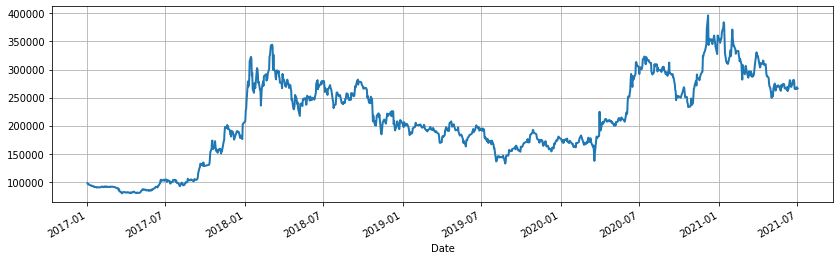

In [12]:
# 셀트리온, 2017년~현재

df = fdr.DataReader('068270', '2017')
df['Close'].plot()

# 가격 데이터 - 미국 주식
티커를 사용. 예를 들어, 'AAPL'(애플), 'AMZN'(아마존), 'GOOG'(구글)

In [18]:
# 구글(GOOG), 2018-01-01 ~ Today
df = fdr.DataReader('GOOG', '2018-01-01')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-25,2539.9,2539.1,2550.1,2528.9,1670000.0,-0.0022
2021-06-28,2536.4,2539.0,2545.9,2520.5,1410000.0,-0.0014
2021-06-29,2520.4,2535.2,2535.2,2509.0,1050000.0,-0.0063
2021-06-30,2506.3,2514.3,2515.0,2495.9,1200000.0,-0.0056
2021-07-01,2527.4,2499.0,2528.9,2499.0,856230.0,0.0084


<AxesSubplot:xlabel='Date'>

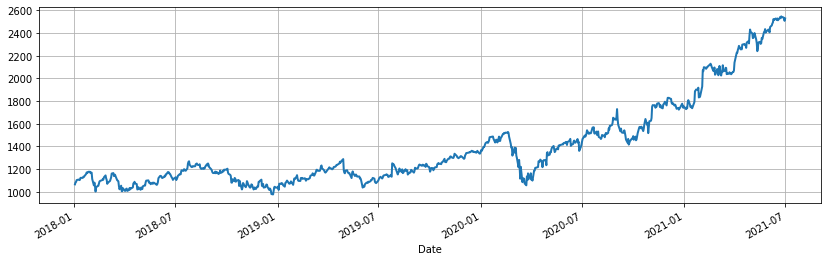

In [19]:
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

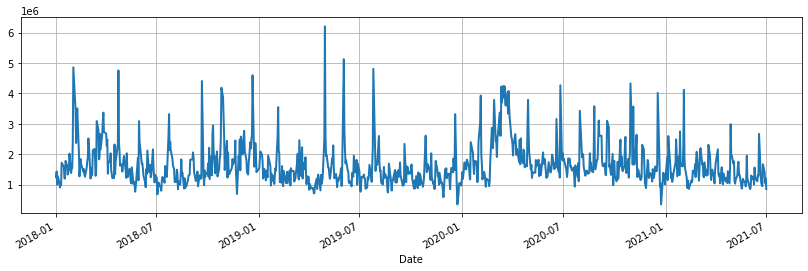

In [20]:
df['Volume'].plot()

<AxesSubplot:xlabel='Date'>

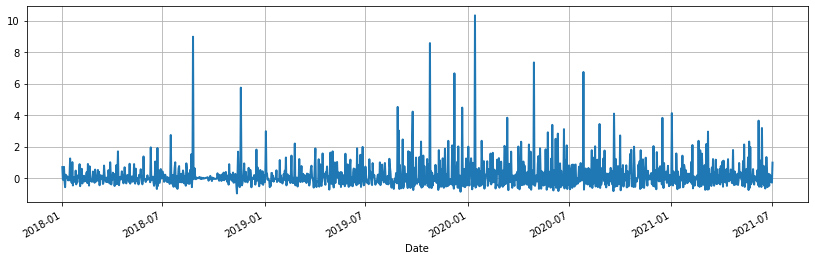

In [28]:
df['Volume'].pct_change().plot()

<AxesSubplot:xlabel='Date'>

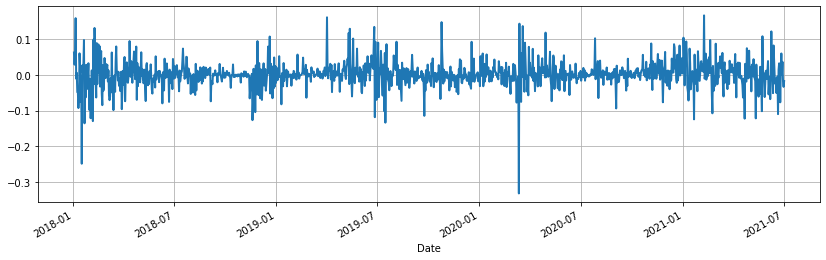

In [29]:
df['Close'].pct_change().plot()

<AxesSubplot:xlabel='Date'>

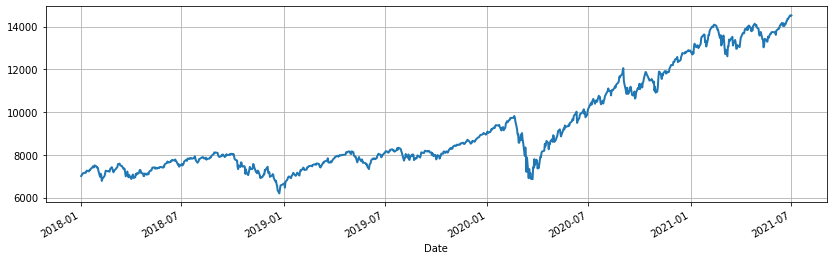

In [23]:
# IXIC (나스닥 지수), 2018년~현재
df = fdr.DataReader('IXIC', '2018')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

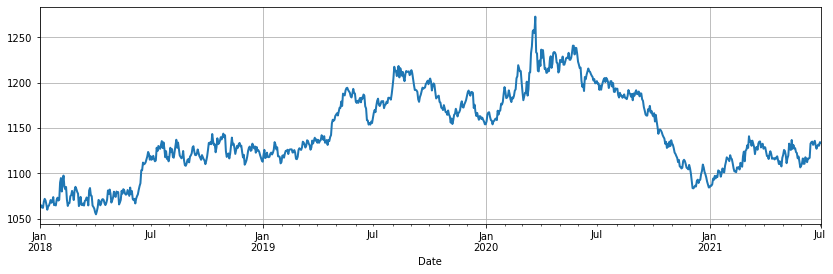

In [24]:
# 원달러 환율, 2018년~현재
df = fdr.DataReader('USD/KRW', '2018')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

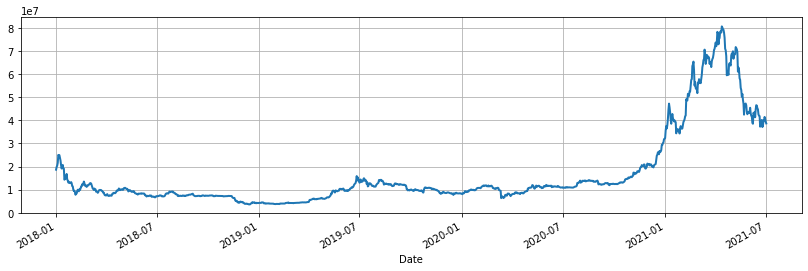

In [25]:
# 비트코인 원화 가격 (빗썸), 2018년~현재
df = fdr.DataReader('BTC/KRW', '2018')
df['Close'].plot()